In [ ]:
# ! pip install openai
# ! pip install evaluate
# ! pip install rouge
# ! pip install python-Levenshtein
# ! pip install nltk
# ! pip install git+https://github.com/google-research/bleurt.git

In [ ]:
import pandas as pd
import os
from evaluate import load
import re
from rouge import Rouge
from bleurt import score
import Levenshtein
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import sentence_bleu
import matplotlib.pyplot as plt
import numpy as np
# Set chained_assignment to 'None' to suppress the SettingWithCopyWarning
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Read the XLSX file into a DataFrame
test_df = pd.read_excel('/content/RAG_dataset.xlsx')

In [ ]:
test_df.dtypes

Description            object
description_prompts    object
Relevance              object
text                   object
task                   object
RAG_relavance          object
dtype: object

In [ ]:
# List of generated responses and corresponding reference texts
generated_responses = test_df['RAG_relavance'].tolist()
actual_texts = test_df['Relevance'].tolist()

**Function to calculate bleu score**

In [ ]:
# def calculate_bleu_score_by_context_length(Generated_Response, Response):
#     # if len(Generated_Response) != len(Response):
#     #     raise ValueError("Lists must be the same length.")

#     bleu_scores = []
#     for generated_response, response in zip(Generated_Response, Response):
#         generated_response_tokens = word_tokenize(generated_response.lower())
#         response_tokens = word_tokenize(response.lower())
#         context_length = len(response_tokens)

#         if context_length > 3:
#             bleu_score_pair = sentence_bleu([response_tokens], generated_response_tokens, weights=(0.25, 0.25, 0.25, 0.25))
#         elif context_length == 3:
#             bleu_score_pair = sentence_bleu([response_tokens], generated_response_tokens, weights=(0.33, 0.33, 0.33, 0))
#         elif context_length == 2:
#             bleu_score_pair = sentence_bleu([response_tokens], generated_response_tokens, weights=(0.5, 0.5, 0, 0))
#         else:
#             bleu_score_pair = sentence_bleu([response_tokens], generated_response_tokens, weights=(1, 0, 0, 0))

#         bleu_scores.append(bleu_score_pair)
#     return bleu_scores

In [ ]:
# bleu_scores = calculate_bleu_score_by_context_length(test_df['RAG_relavance'], test_df['Relevance'])
# test_df['BLEU_Scores'] = bleu_scores

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
# Function to tokenize a sentence without including spaces at the beginning and end
def tokenize(sentence):
    tokens = word_tokenize(sentence.lower())
    # Remove spaces at the beginning and end
    tokens = [token for token in tokens if token.strip()]
    return tokens

# Function to calculate BLEU score for a pair of sentences
def calculate_bleu_score(candidate, reference):
    # Tokenize the candidate and reference
    candidate_tokens = tokenize(candidate)
    reference_tokens = tokenize(reference)

    # Calculate BLEU score
    bleu_score = sentence_bleu([reference_tokens], candidate_tokens, weights=(1, 0, 0, 0))
    return bleu_score

# Lists to store BLEU scores
bleu_scores = []

# Calculate BLEU scores for each row
for i, (response, generated_response) in enumerate(zip(test_df['Relevance'], test_df['RAG_relavance']), start=1):
    # Calculate BLEU score
    bleu_score = calculate_bleu_score(generated_response, response)
    bleu_scores.append(bleu_score)

# Add BLEU score column to the DataFrame
test_df['BLEU_Score'] = bleu_scores

# Round the BLEU score column to two decimal places
test_df['BLEU_Score'] = test_df['BLEU_Score'].round(2)
test_df.tail()

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

,Description,description_prompts,Relevance,text,task,RAG_relavance,BLEU_Score
425,Provide the exact files in the /Downloads dire...,Design a BigFix relevance clause in accordance...,"files whose (name of it ends with "".zip"") of f...",<s>[INST]<<SYS>>Design a BigFix relevance clau...,relevance,"`(name of it, size of it, modification time of...",0.48
426,Provide the distinct files from the directory ...,Create a relevance script that meets the provi...,"files whose (name of it ends with "".xlsx"") of ...",<s>[INST]<<SYS>>Create a relevance script that...,relevance,"unique values of names of files of folder ""/Aion""",0.37
427,List the particular files in the /Projects dir...,Formulate relevance logic for the given descri...,"files whose (name of it ends with "".pdf"") of f...",<s>[INST]<<SYS>>Formulate relevance logic for ...,relevance,"""files of folder ""/Projects""""",0.32
428,Provide the dimensions of files exceeding 1MB ...,Write BigFix relevance code that matches the d...,"files whose (size of it > ""1000000"") of folder...",<s>[INST]<<SYS>>Write BigFix relevance code th...,relevance,"relevance\n(names of it, sizes of it, dimensio...",0.41
429,Verify the presence of libxml2 package,Formulate relevance logic for the given descri...,"if (exists packages ""libxml2"" of rpm) then ""Ye...",<s>[INST]<<SYS>>Formulate relevance logic for ...,relevance,"relevance\nexists package ""libxml2"" of rpm",0.21


In [ ]:
test_df.head()

,Description,description_prompts,Relevance,text,task,RAG_relavance,BLEU_Score
0,Give the processor information,Produce BigFix relevance code to address the g...,vendor names of processors,<s>[INST]<<SYS>>Produce BigFix relevance code ...,relevance,name of processor,0.24
1,find the speed of processor,Formulate BigFix relevance code to match the p...,speeds of processors,<s>[INST]<<SYS>>Formulate BigFix relevance cod...,relevance,name of current processor,0.25
2,find unique processor names,Design a relevance clause in accordance with t...,unique values of vendor names of processors,<s>[INST]<<SYS>>Design a relevance clause in a...,relevance,unique values of names of processors,0.85
3,find name of operating system,Design a relevance clause in accordance with t...,name of operating system,<s>[INST]<<SYS>>Design a relevance clause in a...,relevance,name of operating system,1.00
4,find family names of processor,Generate BigFix relevance rules based on the p...,family names of processors,<s>[INST]<<SYS>>Generate BigFix relevance rule...,relevance,"""family name of processors""",0.50


**Function to calculate rouge score**

In [ ]:
# Initialize Rouge
rouge = Rouge()

def calculate_rouge_scores(candidate, reference):
    try:
        rouge = Rouge()
        scores = rouge.get_scores(candidate, reference, avg=True)
        rouge_1_f1 = scores['rouge-1']['f']
        rouge_2_f1 = scores['rouge-2']['f']
        rouge_l_f1 = scores['rouge-l']['f']
        return rouge_1_f1, rouge_2_f1, rouge_l_f1
    except Exception as e:
        print(f"Error calculating ROUGE scores since no output generated: {e}")
        return 0.0, 0.0, 0.0

rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

# Calculate ROUGE scores for each generated response
for i, (response, reference_text) in enumerate(zip(generated_responses, actual_texts), start=1):
    # Calculate ROUGE scores
    rouge_1_f1, rouge_2_f1, rouge_l_f1 = calculate_rouge_scores(response, reference_text)
    rouge_1_scores.append(rouge_1_f1)
    rouge_2_scores.append(rouge_2_f1)
    rouge_l_scores.append(rouge_l_f1)

# Add BLEU and ROUGE score columns to the DataFrame
test_df['ROUGE-1_Score'] = rouge_1_scores
test_df['ROUGE-2_Score'] = rouge_2_scores
test_df['ROUGE-l_Score'] = rouge_l_scores

test_df['ROUGE-1_Score'] = test_df['ROUGE-1_Score'].round(2)
test_df['ROUGE-2_Score'] = test_df['ROUGE-2_Score'].round(2)
test_df['ROUGE-l_Score'] = test_df['ROUGE-l_Score'].round(2)

**Function to calculate levenshtein distance**

In [ ]:
# Function to calculate Levenshtein distance
def calculate_levenshtein_distance(str1, str2):
    return Levenshtein.distance(str1, str2)

column1 = 'Relevance'
column2 = 'RAG_relavance'

# Add a new column to your DataFrame with the Levenshtein distance
test_df['levenshtein_distance'] = test_df.apply(lambda row: calculate_levenshtein_distance(row[column1], row[column2]), axis=1)

In [ ]:
test_df.head()

,Description,description_prompts,Relevance,text,task,RAG_relavance,BLEU_Score,ROUGE-1_Score,ROUGE-2_Score,ROUGE-l_Score,levenshtein_distance
0,Give the processor information,Produce BigFix relevance code to address the g...,vendor names of processors,<s>[INST]<<SYS>>Produce BigFix relevance code ...,relevance,name of processor,0.24,0.29,0.00,0.29,9
1,find the speed of processor,Formulate BigFix relevance code to match the p...,speeds of processors,<s>[INST]<<SYS>>Formulate BigFix relevance cod...,relevance,name of current processor,0.25,0.29,0.00,0.29,14
2,find unique processor names,Design a relevance clause in accordance with t...,unique values of vendor names of processors,<s>[INST]<<SYS>>Design a relevance clause in a...,relevance,unique values of names of processors,0.85,0.91,0.73,0.91,7
3,find name of operating system,Design a relevance clause in accordance with t...,name of operating system,<s>[INST]<<SYS>>Design a relevance clause in a...,relevance,name of operating system,1.00,1.00,1.00,1.00,0
4,find family names of processor,Generate BigFix relevance rules based on the p...,family names of processors,<s>[INST]<<SYS>>Generate BigFix relevance rule...,relevance,"""family name of processors""",0.50,0.25,0.00,0.25,3


In [ ]:
# Load the BLEU-RT metric
from datasets import load_metric
metric = load_metric("bleurt")

<ipython-input-11-c1de478e3283>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("bleurt")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for bleurt contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/bleurt/bleurt.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
# Calculate scores for each row
scores = []
for index, row in test_df.iterrows():
    output = row["Relevance"]
    generated_output = row["RAG_relavance"]

    # Calculate BLEU-RT score
    score = metric.compute(predictions=[generated_output], references=[output])["scores"][0]
    scores.append(score)

# Add scores to the dataset
test_df["bleurt_score"] = scores

In [ ]:
test_df.head()

,Description,description_prompts,Relevance,text,task,RAG_relavance,BLEU_Score,ROUGE-1_Score,ROUGE-2_Score,ROUGE-l_Score,levenshtein_distance,bleurt_score
0,Give the processor information,Produce BigFix relevance code to address the g...,vendor names of processors,<s>[INST]<<SYS>>Produce BigFix relevance code ...,relevance,name of processor,0.24,0.29,0.00,0.29,9,-0.230036
1,find the speed of processor,Formulate BigFix relevance code to match the p...,speeds of processors,<s>[INST]<<SYS>>Formulate BigFix relevance cod...,relevance,name of current processor,0.25,0.29,0.00,0.29,14,-1.153511
2,find unique processor names,Design a relevance clause in accordance with t...,unique values of vendor names of processors,<s>[INST]<<SYS>>Design a relevance clause in a...,relevance,unique values of names of processors,0.85,0.91,0.73,0.91,7,0.519509
3,find name of operating system,Design a relevance clause in accordance with t...,name of operating system,<s>[INST]<<SYS>>Design a relevance clause in a...,relevance,name of operating system,1.00,1.00,1.00,1.00,0,0.999162
4,find family names of processor,Generate BigFix relevance rules based on the p...,family names of processors,<s>[INST]<<SYS>>Generate BigFix relevance rule...,relevance,"""family name of processors""",0.50,0.25,0.00,0.25,3,0.310166


**Printing the avg scores**

In [ ]:
# Calculate the mean score
mean_Bleu_scores = np.mean(test_df['BLEU_Score'])
mean_levenshtein_distance = np.mean(test_df['levenshtein_distance'])
mean_bleurt = np.mean(test_df['bleurt_score'])

# Calculate the mean ROUGE-1, ROUGE-2, and ROUGE-l scores
mean_rouge_1_score = np.mean(test_df['ROUGE-1_Score'])
mean_rouge_2_score = np.mean(test_df['ROUGE-2_Score'])
mean_rouge_l_score = np.mean(test_df['ROUGE-l_Score'])

# Print the mean scores
print(f"Mean BLEU Score: {round(mean_Bleu_scores,2)}")
print(f"Mean ROUGE-1 Score: {round(mean_rouge_1_score,2)}")
print(f"Mean ROUGE-2 Score: {round(mean_rouge_2_score,2)}")
print(f"Mean ROUGE-l Score: {round(mean_rouge_l_score,2)}")
# print(f"Mean BLEU-RT Score: {round(mean_bleurt,2)}")
print(f"Mean LEVENSHTEIN Score: {round(mean_levenshtein_distance,2)}")


Mean BLEU Score: 0.52
Mean ROUGE-1 Score: 0.53
Mean ROUGE-2 Score: 0.4
Mean ROUGE-l Score: 0.52
Mean LEVENSHTEIN Score: 38.82


In [ ]:
test_df.head(2)

,Description,description_prompts,Relevance,text,task,RAG_relavance,BLEU_Score,ROUGE-1_Score,ROUGE-2_Score,ROUGE-l_Score,levenshtein_distance,bleurt_score
0,Give the processor information,Produce BigFix relevance code to address the g...,vendor names of processors,<s>[INST]<<SYS>>Produce BigFix relevance code ...,relevance,name of processor,0.24,0.29,0.0,0.29,9,-0.230036
1,find the speed of processor,Formulate BigFix relevance code to match the p...,speeds of processors,<s>[INST]<<SYS>>Formulate BigFix relevance cod...,relevance,name of current processor,0.25,0.29,0.0,0.29,14,-1.153511


In [ ]:
test_df.to_excel('scores_RAG_dataset.xlsx', index=False)

**Get the scores based on Task types**

In [ ]:
# Group by 'task' and calculate average for scores and execution time
avg_scores = test_df.groupby('Task')[['BLEU_Scores', 'ROUGE-1_Score', 'ROUGE-2_Score', 'ROUGE-l_Score', 'levenshtein_distance', 'bleurt_score']].mean()
avg_execution_time = test_df.groupby('Task')['Generation_Time (seconds)'].mean()

# Create a DataFrame for average scores
avg_scores_df = pd.DataFrame(avg_scores)

# Rename columns for clarity
avg_scores_df = avg_scores_df.rename(columns={'BLEU_Scores': 'Avg_BLEU_Scores',
                                              'ROUGE-1_Score': 'Avg_ROUGE-1_Score',
                                              'ROUGE-2_Score': 'Avg_ROUGE-2_Score',
                                              'ROUGE-l_Score': 'Avg_ROUGE-l_Score',
                                              'levenshtein_distance':'Avg_levenshtein_distance',
                                              'bleurt_score':'Avg_bleurt_score'})

# Round off the values to 2 decimal places
avg_scores_df = avg_scores_df.round(2)

# Round off the average execution time as well
avg_execution_time = round(avg_execution_time, 2)
# print(avg_execution_time)
# Add average execution time to the scores DataFrame
avg_scores_df['Avg_Execution_Time(sec)'] = avg_execution_time

In [ ]:
# Add a column with the count of entries in each task group
avg_scores_df['Task_Count'] = test_df.groupby('Task')['Task'].count()

# Add a column to count the number of times BLEU score is 1 for each task
avg_scores_df['Accurate'] = test_df.groupby('Task')['BLEU_Scores'].apply(lambda x: (x == 1).sum())

avg_scores_df

,Avg_BLEU_Scores,Avg_ROUGE-1_Score,Avg_ROUGE-2_Score,Avg_ROUGE-l_Score,Avg_levenshtein_distance,Avg_bleurt_score,Avg_Execution_Time(sec),Task_Count,Accurate
Task,,,,,,,,,
description,0.57,0.75,0.63,0.74,39.43,0.38,1.74,757,129
rectify,0.97,0.98,0.97,0.98,0.58,0.95,1.33,168,145
relevance,0.82,0.89,0.83,0.88,29.61,0.66,2.27,757,512


In [ ]:
test_df[['BLEU_Scores','ROUGE-1_Score','ROUGE-2_Score','ROUGE-l_Score','levenshtein_distance','bleurt_score']]

,BLEU_Scores,ROUGE-1_Score,ROUGE-2_Score,ROUGE-l_Score,levenshtein_distance,bleurt_score
0,9.665396e-01,1.00,0.99,1.00,4,0.942546
1,1.000000e+00,1.00,1.00,1.00,0,0.945775
2,9.648572e-01,0.94,0.95,0.94,4,0.794792
3,5.153330e-155,0.25,0.00,0.20,141,-0.968582
4,1.000000e+00,1.00,1.00,1.00,0,0.965217
5,4.546697e-01,0.64,0.38,0.64,22,0.474303
6,1.560424e-01,0.42,0.17,0.42,35,-1.001542
7,1.351961e-231,0.43,0.00,0.43,24,0.201421
8,1.000000e+00,1.00,1.00,1.00,0,0.958507
9,1.000000e+00,1.00,1.00,1.00,0,0.956851


In [ ]:
# Save the updated DataFrame to a excel file
test_df.to_excel('eval_score_code_t5_plus_batch_1.xlsx', index=False)

**Data-source wise Distribution**

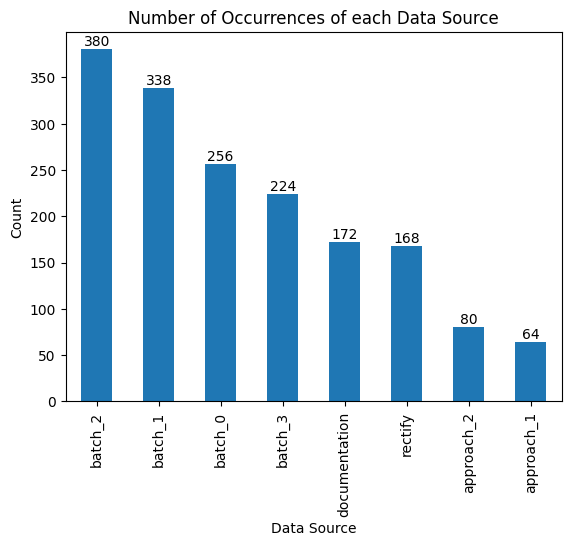

In [ ]:
# Use value_counts() to get the count of each distinct value in 'Data Source'
data_source_counts = test_df['Data_Source'].value_counts()

# Plotting the bar plot
ax = data_source_counts.plot(kind='bar')
plt.xlabel('Data Source')
plt.ylabel('Count')
plt.title('Number of Occurrences of each Data Source')

# Adding annotations to each bar
for i, count in enumerate(data_source_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()


**Get the scores based on data sources**

In [ ]:
# Group by 'task' and calculate average for scores and execution time
avg_scores = test_df.groupby('Data_Source')[['BLEU_Scores', 'ROUGE-1_Score', 'ROUGE-2_Score', 'ROUGE-l_Score', 'levenshtein_distance', 'bleurt_score']].mean()
avg_execution_time = test_df.groupby('Data_Source')['Generation_Time (seconds)'].mean()

# Create a DataFrame for average scores
avg_scores_df = pd.DataFrame(avg_scores)

# Rename columns for clarity
avg_scores_df = avg_scores_df.rename(columns={'BLEU_Scores': 'Avg_BLEU_Scores',
                                              'ROUGE-1_Score': 'Avg_ROUGE-1_Score',
                                              'ROUGE-2_Score': 'Avg_ROUGE-2_Score',
                                              'ROUGE-l_Score': 'Avg_ROUGE-l_Score',
                                              'levenshtein_distance':'Avg_levenshtein_distance',
                                              'bleurt_score':'Avg_bleurt_score'})

# Round off the values to 2 decimal places
avg_scores_df = avg_scores_df.round(2)

# Round off the average execution time as well
avg_execution_time = round(avg_execution_time, 2)
# print(avg_execution_time)
# Add average execution time to the scores DataFrame
avg_scores_df['Avg_Execution_Time(sec)'] = avg_execution_time


# Add a column with the count of entries in each task group
avg_scores_df['Source_Count'] = test_df.groupby('Data_Source')['Data_Source'].count()

# Add a column to count the number of times BLEU score is 1 for each task
avg_scores_df['Accurate'] = test_df.groupby('Data_Source')['BLEU_Scores'].apply(lambda x: (x == 1).sum())

avg_scores_df

,Avg_BLEU_Scores,Avg_ROUGE-1_Score,Avg_ROUGE-2_Score,Avg_ROUGE-l_Score,Avg_levenshtein_distance,Avg_bleurt_score,Avg_Execution_Time(sec),Source_Count,Accurate
Data_Source,,,,,,,,,
approach_1,0.74,0.86,0.77,0.84,32.67,0.57,2.46,64,33
approach_2,0.53,0.74,0.57,0.71,175.25,0.24,10.63,80,18
batch_0,0.80,0.88,0.81,0.87,12.59,0.66,1.26,256,112
batch_1,0.74,0.85,0.78,0.85,34.94,0.57,1.80,338,149
batch_2,0.66,0.78,0.69,0.77,38.85,0.39,1.66,380,144
batch_3,0.72,0.84,0.76,0.83,17.58,0.57,1.35,224,106
documentation,0.56,0.76,0.62,0.75,14.09,0.53,0.94,172,79
rectify,0.97,0.98,0.97,0.98,0.58,0.95,1.33,168,145


In [ ]:
# Filter the dataframe for rows where Task is 'Relevance'
test_relevance_df = test_df[test_df['Task'] == 'relevance']

# Group by 'task' and calculate average for scores and execution time
avg_scores = test_relevance_df.groupby('Data_Source')[['BLEU_Scores', 'ROUGE-1_Score', 'ROUGE-2_Score', 'ROUGE-l_Score', 'levenshtein_distance', 'bleurt_score']].mean()
avg_execution_time = test_relevance_df.groupby('Data_Source')['Generation_Time (seconds)'].mean()

# Create a DataFrame for average scores
avg_scores_df = pd.DataFrame(avg_scores)

# Rename columns for clarity
avg_scores_df = avg_scores_df.rename(columns={'BLEU_Scores': 'Avg_BLEU_Scores',
                                              'ROUGE-1_Score': 'Avg_ROUGE-1_Score',
                                              'ROUGE-2_Score': 'Avg_ROUGE-2_Score',
                                              'ROUGE-l_Score': 'Avg_ROUGE-l_Score',
                                              'levenshtein_distance':'Avg_levenshtein_distance',
                                              'bleurt_score':'Avg_bleurt_score'})

# Round off the values to 2 decimal places
avg_scores_df = avg_scores_df.round(2)

# Round off the average execution time as well
avg_execution_time = round(avg_execution_time, 2)
# print(avg_execution_time)
# Add average execution time to the scores DataFrame
avg_scores_df['Avg_Execution_Time(sec)'] = avg_execution_time


# Add a column with the count of entries in each task group
avg_scores_df['Source_Count'] = test_relevance_df.groupby('Data_Source')['Data_Source'].count()

# Add a column to count the number of times BLEU score is 1 for each task
avg_scores_df['Accurate'] = test_relevance_df.groupby('Data_Source')['BLEU_Scores'].apply(lambda x: (x == 1).sum())

avg_scores_df

,Avg_BLEU_Scores,Avg_ROUGE-1_Score,Avg_ROUGE-2_Score,Avg_ROUGE-l_Score,Avg_levenshtein_distance,Avg_bleurt_score,Avg_Execution_Time(sec),Source_Count,Accurate
Data_Source,,,,,,,,,
approach_1,0.95,0.96,0.94,0.96,6.44,0.88,2.57,32,28
approach_2,0.90,0.93,0.90,0.93,59.70,0.78,12.04,40,18
batch_0,0.92,0.96,0.88,0.95,4.64,0.90,1.34,128,110
batch_1,0.80,0.88,0.82,0.87,43.91,0.62,2.12,169,113
batch_2,0.73,0.81,0.74,0.80,51.43,0.41,2.06,190,106
batch_3,0.81,0.88,0.83,0.88,15.73,0.65,1.37,112,67
documentation,0.88,0.94,0.90,0.93,3.20,0.80,0.91,86,70
